# Assignment 4

This assignment covers material on numerical integration. The assignment is due on by 7pm on Friday the 6th of March.

The breakdown of the marks is as follows:

Question 0 - [1 mark]  
Question 1 - [4 marks]  
Questino 2 - [5 marks]  
Question 3 - [5 marks]  
Question 4 - [5 marks]  
Question 5 - [5 marks]  
Question 6 - [5 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1

In this question you will be asked to evaluate definite integrals in the form:

$$ \int_a^b f(x)\, dx$$ 

using Simpson's rule. You can copy code from the [examples repository](https://github.com/nielsw2/ACM20030-Examples) if you wish, but if you do remove all the plotting functionality. Do not use SciPy or any other library to evaluate the integrals, unless explicitly asked to do so.

## Q1 a

Evaluate $$ \frac{1}{\sqrt{\pi}}\int^{10}_{-10} e^{-x^2}\, dx$$

Use enough strips so that the result is accurate to a relative error of of at least 1e-6. Hint: to within machine precision the above integral evaluates to  1 .

In [2]:
# Defining a Simpson's rule function

def SimpsonsIntegrate(f, a, b, N):
    dx = (b-a)/N
    xi = a
    area = 0
    i = 0
    while i < N:  
        # The below line applies Simpson's rule
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        
        xi += dx
        i += 1 
    return area

# Defining the Q1(a) function

def f(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

# Evaluating the integral

answer1 = SimpsonsIntegrate(f,-10,10,25)

print("The integral is evaluated as", answer1, "which has an error of", abs(1 - answer1), ", which is less than 1e-6.")

The integral is evaluated as 1.0000001338264555 which has an error of 1.3382645547288519e-07 , which is less than 1e-6.


## Q1 b

Evaluate

$$\int^{50}_{-50} \frac{1}{\cosh x}\,dx $$

Use enough strips so that the result is accurate to a relative error of at least `1e-6`. Hint: to within machine precision the above integral evaluates to $\pi$.

In [3]:
# Defining the function

def g(x):
    return 1/np.cosh(x)

# Evaluating the integral

answer2 = SimpsonsIntegrate(g,-50,50,250)

print("The integral is evaluated as", answer2, "which has an error of", abs(math.pi - answer2), ", which is less than 1e-6.")

The integral is evaluated as 3.1415926535091985 which has an error of 8.059464207121891e-11 , which is less than 1e-6.


## Q1 c

Use SciPy's `integrate.quad()` function to evaluate the integrals in Q1a and Q1b

In [4]:
# Printing the results of the evaluated integrals

print(integrate.quad(f, -10, 10))
print(integrate.quad(g, -50, 50))

(0.9999999999999999, 2.085612812503633e-13)
(3.141592653589793, 5.5381858831212136e-11)


# Question 2 - improper integrals

In the lectures we looked at numerically evaluating indefinite integrals of the form

$$ \int^b_a f(x)\, dx$$ where $a,b$ are finite. What about improper integrals where either $a$, $b$ or both are infinite? The methods we know so far cannot immediately be applied to these cases.

One method is to transform the integral using the result

$$ \int_a^b f(x)\, dx = \int^{1/a}_{1/b} t^{-2} f(t^{-1})\, dt$$

which holds so long as $a,b>0$.

## Q2 a

Using the above result numerically evaluate the following integral

$$ \int^\infty_1 \frac{\log(x)}{x^3}\,dx $$

using Simpson's rule. Use 100 strips to evaluate the integral.

Hint: you will have to use an `if` statement inside your transformed function for to deal with $t=0$. For this case it is useful to note that $\lim_{t\rightarrow0} t \log(1/t) = 0$.

In [5]:
#letting t= 1/x, dt = -2/x**2
# t**-2/t**-3 = t

# Defining the Q2(a) function

def h(t):
    return t*np.log(t**-1)

# Defining a specialised Simpson's rule function

def SimpsonsIntegrateQ2a(f, a, b, N, plotMethod=False):
    dx = (b-a)/N
    xi = a
    area = 0
    i = 0
    while i < N: 
        # Correcting t = 0 error, adding to the area for each point except x = 0
        if xi == 0:
            area += dx/6*(4*f((2*xi+dx)/2) + f(xi+dx))
            
            xi += dx
            i += 1
            continue
        # The below line applies Simpson's rule
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        
        xi += dx
        i += 1 
    return area


SimpsonsIntegrateQ2a(h,0,1,100)

0.2499980745946372

## Q2 b

Numerically evaluate

$$ \int^\infty_0 \frac{1}{(x+1)^3}\,dx$$

using Simpson's rule.

Hint: break the integral into two integrals, one with a finite domain and one with an infinite domain. In each domain use 100 strips to evalute the integral. Check your answer against the analytic result.

In [6]:
# From x=0 to x=1 using original Simpson's rule function
def i(x):
    return 1/(x+1)**3
area1 = SimpsonsIntegrate(i, 0, 1, 100)

# From x=1 to x=infinity
# ie. from t=0 to t=1
def k(t):
    return t/(t+1)**3
area2 = SimpsonsIntegrate(k, 0, 1, 100)



total_area = area1+area2
print("The integral is evaluated as",total_area, "which has an error of", abs(total_area - 0.5) ,", less than 1e-10, when compared to the analytic result of 0.5")

The integral is evaluated as 0.5000000000807215 which has an error of 8.072154056293357e-11 , less than 1e-10, when compared to the analytic result of 0.5


# Question 3 - Boole's rule

Fitting the integrand to a quintic polynomial results in Boole's rule for integration. In the lecture the formula for Boole's rule was given as

$$ \int^b_a f(x)\,dx \simeq \frac{2 \Delta x}{45}\left(7f_0 + 32 f_1 + 12 f_2 +32f_3 + 7 f_4\right) $$

where $\Delta x = (b-a)/4$, and $f_i = f(a + i\Delta x)$.

## Q3 a

Write a function that numerically integrates another function using Boole's rule. Use the following function definition:

In [7]:
# Defining a Boole's rule function

def BooleIntegration(f, a, b, N):
    dx = (b-a)/(4*N)
    xi = a
    area = 0
    i = 0
    
    while i < N:  
        # The below line applies Boole's rule
        xi = a +4*i*dx
        area += 2*dx/45*(7*f(xi)+32*f(xi+dx)+12*f(xi+2*dx)+32*f(xi+3*dx)+7*f(xi+4*dx))
        
        
        i += 1
    
    return area

Test your function by evaluating the following using 100 strips.

$$ \int_0^\pi \sin(x)\,dx $$

In [8]:
# Defining the function

def l(x):
    return np.sin(x)

# Printing the result

answer3 = BooleIntegration(l,0,math.pi,100)

print("The integral is evaluated as",answer3, "which has an error of", abs(answer3 - 2) ," when compared to the analytical result of 2.")

The integral is evaluated as 1.999999999999998 which has an error of 1.9984014443252818e-15  when compared to the analytical result of 2.


## Q3 b

For Boole's rule show that the global error scales as $\Delta x^6$. The below plot shows a $\Delta x^6$ reference line.

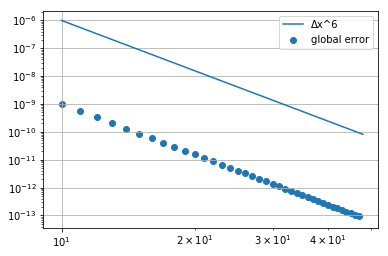

In [9]:
# Calculating the reference line
x = np.linspace(10,48,100)
y = x**-6

# Analytical answer is "2" for Q3(a), so we plot the difference between the calculated answer and 2

# Creating a matrix to store the global error points

M = np.empty([38,2])
N = 10

imax = np.size(M[:,0])
i = 0
while i < imax:
    
    M[i,0] = N
    M[i,1] = np.abs(BooleIntegration(l,0,math.pi,N)-2)
    
    i += 1
    N += 1
    #print(N) for debugging

# Plotting the global error and reference line

plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.plot(x,y, label = "Δx^6")
plt.scatter(M[:,0],M[:,1], label = "global error")
plt.legend();

# Question 4 - integrand with a singularity

The techniques developed in the lecture require the integrand to be continuous and bounded. What happens if there is a singularity in the integrand? In general these can be difficult to deal with (though some more generic methods exist - see, e.g., [Tanh-sinh quadrature](https://en.wikipedia.org/wiki/Tanh-sinh_quadrature)).

In this example we will look at an explicit example that can be dealt with by a change of variables. Consider the identity:

$$ \int_0^1 \frac{f(x)}{x^\alpha}\, dx = \frac{1}{\alpha} \int_0^1 f(t^{1/\alpha}) t^{(1-2\alpha)/\alpha}\,dt$$

which is achived by changing variables using $t = x^\alpha$. This identity holds when $0 < \alpha < 1$ and $f(x)$ is continous on $[0,1]$.

Let
$$I = \int^1_0 \frac{\cos(10x)}{x^{1/2}}\,dx $$

Plot the integrand in the range $[0,1]$, use a grid and label your axes.

C:\Users\grayh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


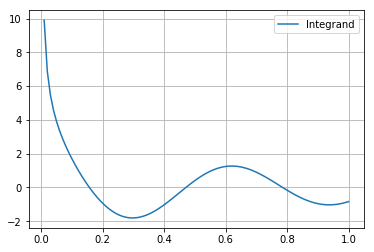

In [10]:
# Defining the untransformed function
def m(x):
    return np.cos(10*x)/x**(1/2)

# Plotting the function
c = np.linspace(0,1,100)
d = m(c)
plt.grid(True)
plt.plot(c,d, label = "Integrand")
plt.legend();

# Note: the error displayed below is due to the evaluation of the function at x=0
# To obtain an (almost) identical plot without the error, the linspace can be defined as starting at 0.01, ie. a number close to x
# Given that the plot is requested for the closed interval, the error was included.

Define and plot the transformed integrand. For the plot use a grid and label your axes.

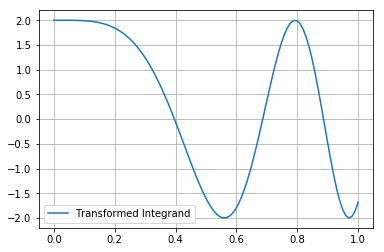

In [11]:
#alpha = 1/2

# Defining the transformed function

def n(t):
    return 2*np.cos(10*t**2)

# Plotting the transformed function

e = np.linspace(0,1,100)
f = n(c)
plt.grid(True)
plt.plot(e,f, label = "Transformed Integrand")
plt.legend();

Numerically evaluate $I$ using Simpson's rule. Use 100 strips to do this.

In [12]:
SimpsonsIntegrate(n,0,1,100)

0.34636620914645183

# Question 5

Write your own function to integrate the following data using Simpson's rule.

In [13]:
x = np.linspace(0, np.pi, 101)
dx = x[1]-x[0]
y = np.sin(x)

In [14]:
def SimpsonsIntegrateData(y, dx):
    area = 0
    i = 0
    N = len(y)
    
    while (2*i < N - 2):
        area += dx/6*(y[2*i] + 4*y[2*i+1] + y[2*i+2])
        i += 1
    
    return 2*area

Integrate the data using your function

In [15]:
SimpsonsIntegrateData(y, dx)

2.000000010824504

Recall that Simpson's method needs an odd number of data points to work. If you use an even number you will get a bad result. If you check the convergence rate in this case you will see it is not what is expected. Checking the convergence rate is an important test of an integration code.

# Question 6

Evaluate the following integral using both Simpsons rule and an RK4 ODE method

$$ \int_0^5 \sinh(x) (x-5)\, dx $$

Compare the results of the two methods and take sufficient strips/small enough step sizes to ensure the results agree to a relative accuracy of 1e-6.

In [16]:
def o(x,y=0):
    return np.sinh(x)*(x-5)

def RK4(f, a, b, y0, imax):
    xi = a
    yi = y0
    
    dx = (b-a)/imax
       
    i = 0
    while i < imax:
        k1 = dx*f(xi,yi)
        k2 = dx*f(xi + 0.5*dx, yi + 0.5*k1)
        k3 = dx*f(xi + 0.5*dx, yi + 0.5*k2)
        k4 = dx*f(xi + dx, yi + k3)
        
        yi = yi + 1/6*(k1 + 2*k2 + 2*k3 + k4)
        
        xi += dx
        i  += 1
    return yi

print("Simpsons rule ", SimpsonsIntegrate(o,0,5,100))
print("RK4 ODE method ", RK4(o,0,5,0,100))

Simpsons rule  -69.2032100839051
RK4 ODE method  -69.20321008390512
